In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Za projekt pri predmetu Programiranje 1 bom analizirala podatke o Ljubljanskem maratonu. Podatke sem dobila iz spletne strani
timing ljubljana. Obseg zajema podatkov sega od 19 Ljubljanskega maratona leta 2014 do 21 Ljubljanskega maratona leta 2016.
Projekt obsega splošno statistiko, koliko držav se udeleži maratona, najboljši tekmovalci, primerjava tekmovalcev glede na
starost in spol ... 

Za vsako leto sem zajela naslednje podatke :
    *mesto tekmovalca (uvrstitev)
    *ime
    *letnica rojstva
    *drzava
    *netto cas
    *kategorija
    *mesto v kategoriji

za začetek si oglejmo naše tabele

In [3]:
tab_moski21 = pd.read_csv('podatki_moski21.csv')
tab_zenske21 = pd.read_csv('podatki_zenske21.csv')
tab_moski20 = pd.read_csv('podatki_moski20.csv')
tab_zenske20 = pd.read_csv('podatki_zenske20.csv')
tab_moski19 = pd.read_csv('podatki_moski19.csv')
tab_zenske19 = pd.read_csv('podatki_zenske19.csv')
tabele = [tab_moski21,tab_moski20,tab_moski19,tab_zenske21,tab_zenske20,tab_zenske19]

In [4]:
tab_moski21[:10]

,letnica_rojstva,ime,drzava,mesto,mesto_v_kategoriji,netto_cas,kategorija
0,1988,Mutai Laban,KEN,1,1,2:09:16,A
1,1983,Kimutai Philip Sanga,KEN,2,1,2:09:19,B
2,1989,Matebo Levi Omari,KEN,3,2,2:09:37,A
3,1988,Misganaw Abraraw,ETH,4,3,2:09:47,A
4,1988,Kosgei Kosgei,KEN,5,4,2:10:18,A
5,1990,Ruto Dominic,KEN,6,5,2:10:29,A
6,1997,Chemonges Robert,UGA,7,6,2:11:04,A
7,1975,Lebid Serhiy,UKR,8,1,2:11:05,D
8,1983,Quaresma Miguel,POR,9,2,2:24:59,B
9,1968,Rosa Eusebio,POR,10,1,2:34:16,E


STATISTIKA GLEDE NA DRŽAVO


poglejmo si najprej število tekmovalcev iz posameznih držav za posamezno leto

In [5]:
drzave21 = tab_moski21['drzava'].value_counts().add(tab_zenske21['drzava'].value_counts(), fill_value=0).sort_values(ascending=False)
drzave21

SLO    1149.0
CRO     211.0
ITA     106.0
AUT      68.0
SRB      62.0
GBR      40.0
GER      30.0
BIH      27.0
HUN      20.0
POL      16.0
CZE      15.0
FRA      13.0
BEL      11.0
SVK      10.0
KEN      10.0
NED       9.0
ESP       8.0
FIN       7.0
EST       6.0
SWE       6.0
ETH       5.0
SUI       5.0
DEN       4.0
POR       4.0
ROM       3.0
RUS       3.0
GRE       3.0
ISR       3.0
USA       2.0
NOR       2.0
SMR       2.0
HRV       1.0
IRL       1.0
UKR       1.0
LAT       1.0
MLT       1.0
MNE       1.0
NZL       1.0
CAN       1.0
BUL       1.0
BLR       1.0
RSA       1.0
UGA       1.0
ALB       1.0
AFG       1.0
Name: drzava, dtype: float64

Uprašajmo se, iz katerih držav prihajajo tekmovalci.

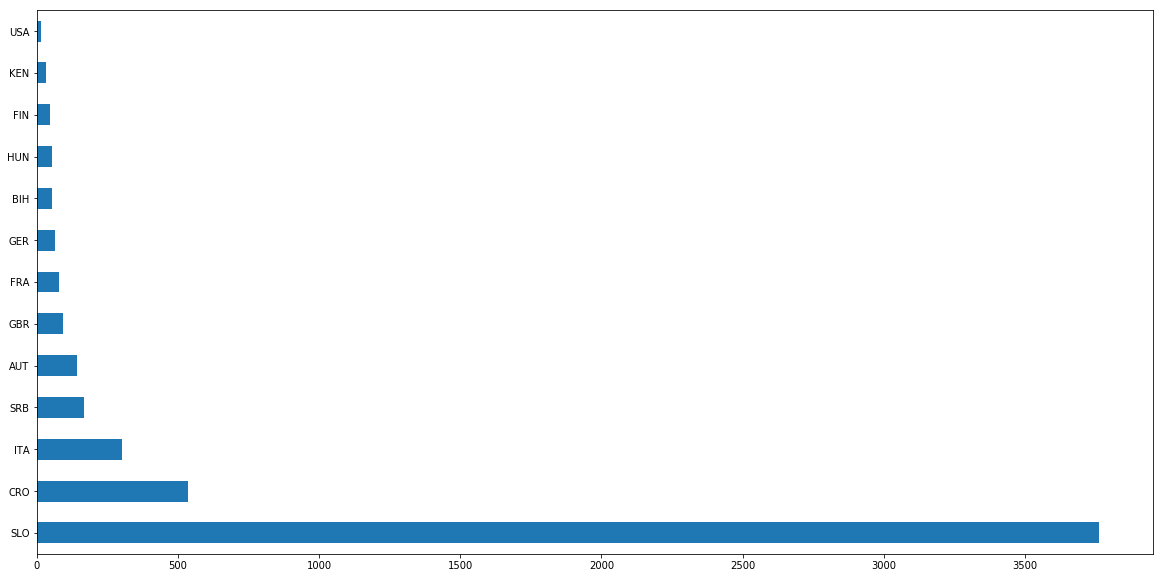

In [6]:
def drzave(tab):
    skupi = 0
    for tabela in tab:
        skupi += tabela['drzava'].value_counts()
    return skupi.sort_values(ascending=False)
drzave(tabele)[:13].plot.barh(stacked=True, figsize = (20,10))

Zaradi preglednosti tabele, sem zajela samo prvih 13 držav. Vidimo, da tekmovalci prihajajo iz različnih držav,
največ pa jih je očitno iz Slovenije.
Ali večje število tekmovalcev iz posamezne države pomeni večjo uspešnost teh tekmovalcev? Če se slovenci udeležujemo
maratona v največjem številu, ali to pomeni da so naši rezultati tudi najboljši? Ali je naprimer uspešnost kenijcev
in američanov slabša, saj je njihovo število tekmovalcev zelo malo?

In [7]:
naj1 = pd.DataFrame(tab_moski21[:10]['drzava'].value_counts())
naj2 = pd.DataFrame(tab_moski20[:10]['drzava'].value_counts())
naj3 = pd.DataFrame(tab_moski19[:10]['drzava'].value_counts())
naj4 = pd.DataFrame(tab_zenske21[:10]['drzava'].value_counts())
naj5 = pd.DataFrame(tab_zenske20[:10]['drzava'].value_counts())
naj6 = pd.DataFrame(tab_zenske19[:10]['drzava'].value_counts())

In [8]:
naj10=(naj1.add(naj2,naj3,naj4, fill_value=0)).add(naj5,naj6,fill_value=0)

In [9]:
naj10.columns = ['stevilo uvrstitev med najboljsih 10']
naj10.sort_values('stevilo uvrstitev med najboljsih 10', ascending = False)

,stevilo uvrstitev med najboljsih 10
KEN,13.0
SLO,5.0
ETH,4.0
POR,2.0
CRO,1.0
GBR,1.0
LTU,1.0
RUS,1.0
UGA,1.0
UKR,1.0


Vidimo, da število udeležencev iz posamezne države ne upliva na boljšo uvrstitev.
Poglejmo še, koliko prvih treh mest je zasedla posamezna država.

In [10]:
def slovar(seznam):
    slovar = {}
    for drzava in seznam:
        if drzava in slovar.keys():
            slovar[drzava] += 1
        else:
            slovar[drzava] = 1
    return slovar

def prva_mesta(tabele):
    prva_mesta = []
    for tabela in tabele:
        prva_mesta.append(tabela['drzava'][0])
    return slovar(prva_mesta)

def druga_mesta(tabele):
    druga_mesta = []
    for tabela in tabele:
        druga_mesta.append(tabela['drzava'][1])
    return slovar(druga_mesta)

def tretja_mesta(tabele):
    tretja_mesta = []
    for tabela in tabele:
        tretja_mesta.append(tabela['drzava'][2])
    return slovar(tretja_mesta)

In [11]:
najboljsi = {'1.mesto':prva_mesta(tabele), '2.mesto':druga_mesta(tabele), '3.mesto':tretja_mesta(tabele)}

In [12]:
pd.DataFrame.from_dict(najboljsi, 'index')

,KEN,ETH
1.mesto,4,2
2.mesto,3,3
3.mesto,5,1


Tabela nam pove, da v vseh treh letih nikoli ni zmagal slovenec, temveč kenijec ali etiopijec.

STATISTIKA GLEDE NA SPOL

In [13]:
stevilo_tekmovalcev = {'m21' : len(tab_moski21),
'z21' : len(tab_zenske21),
'm20' : len(tab_moski20),
'z20' : len(tab_zenske20),
'm19' : len(tab_moski19),
'z19' : len(tab_zenske19)}

In [14]:
a = pd.DataFrame.from_dict(stevilo_tekmovalcev, 'index')
a.columns = ['stevilo']
a

,stevilo
m21,1503
z21,371
m20,1642
z20,379
m19,1397
z19,349


Vidimo, da je stevilo tekmovalcev približno enako iz leta v leto, prav tako pa vidimo, da je moških tekmovalcev vsako
leto priblizno trikrat toliko kot zensk.

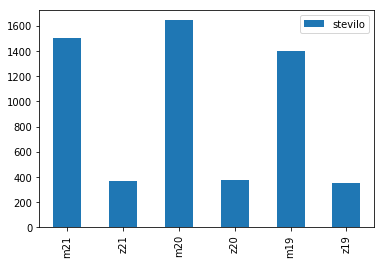

In [15]:
a.plot(kind = 'bar')

Kdo je boljši? Moški ali ženske?

In [17]:
l = {'cas.zenske21':tab_zenske21['netto_cas'], 'cas.zenske20':tab_zenske20['netto_cas'],
    'cas.zenske19':tab_zenske19['netto_cas'], 'cas.moski21':tab_moski21['netto_cas'],
    'cas.moski20':tab_moski20['netto_cas'],'cas.moski19':tab_moski19['netto_cas']}

In [18]:
casi = pd.DataFrame(l)[:10]
casi

,cas.moski19,cas.moski20,cas.moski21,cas.zenske19,cas.zenske20,cas.zenske21
0,2:08:25,2:08:19,2:09:16,2:29:16,2:25:42,2:29:32
1,2:08:37,2:08:37,2:09:19,2:32:29,2:30:36,2:30:53
2,2:09:04,2:08:59,2:09:37,2:33:34,2:33:58,2:31:05
3,2:10:16,2:09:54,2:09:47,2:35:00,2:39:40,2:31:42
4,2:10:17,2:11:20,2:10:18,2:36:02,2:49:33,2:31:45
5,2:10:26,2:12:32,2:10:29,2:40:42,3:00:25,2:32:27
6,2:14:54,2:15:29,2:11:04,2:49:11,3:09:16,2:54:59
7,2:19:31,2:17:10,2:11:05,2:56:39,3:09:57,2:59:00
8,2:21:05,2:20:30,2:24:59,2:57:34,3:12:07,3:01:57
9,2:24:21,2:20:53,2:34:16,3:01:19,3:13:27,3:07:55


Pričakovani rezultati nam povejo, da imajo moški več moči in zato dosegajo boljše rezultate, zato je tudi smiselno da
tekmujemo v ločenih kategorijah.

In [19]:
def cas_v_sekunde(a):
    cas = a.split(':')
    ure = int(cas[0])
    minute = int(cas[1])
    sekunde = int(cas[2])
    return sekunde + minute * 60 + ure * 3600

In [20]:
casi_v_sekundah = casi.applymap(cas_v_sekunde)

In [21]:
brez = casi_v_sekundah[1:]

In [22]:
prva_vrstica = (pd.DataFrame(casi_v_sekundah.iloc[0])).transpose()

In [23]:
naj_moski19 = prva_vrstica['cas.moski19'][0]
naj_moski20 = prva_vrstica['cas.moski20'][0]
naj_moski21 = prva_vrstica['cas.moski21'][0]
naj_zenska19 = prva_vrstica['cas.zenske19'][0]
naj_zenska20 = prva_vrstica['cas.zenske20'][0]
naj_zenska21 = prva_vrstica['cas.zenske21'][0]

In [24]:
def razlika_v_sekundah1(cas):
    return cas - naj_moski19
def razlika_v_sekundah2(cas):
    return cas - naj_moski20
def razlika_v_sekundah3(cas):
    return cas - naj_moski21
def razlika_v_sekundah4(cas):
    return cas - naj_zenska19
def razlika_v_sekundah5(cas):
    return cas - naj_zenska20
def razlika_v_sekundah6(cas):
    return cas - naj_zenska21

In [25]:
brez['cas.moski19'] = brez['cas.moski19'].apply(razlika_v_sekundah1)
brez['cas.moski20'] = brez['cas.moski20'].apply(razlika_v_sekundah2)
brez['cas.moski21'] = brez['cas.moski21'].apply(razlika_v_sekundah3)
brez['cas.zenske19'] = brez['cas.zenske19'].apply(razlika_v_sekundah4)
brez['cas.zenske20'] = brez['cas.zenske20'].apply(razlika_v_sekundah5)
brez['cas.zenske21'] = brez['cas.zenske21'].apply(razlika_v_sekundah6)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [26]:
tabela_zaostankov = prva_vrstica.append(brez)

In [27]:
def sekunde_v_cas(n):
    if n >= 3600:
        ure = n//3600
        minute = (n - ure*3600) // 60
        sekunde = n - ure * 3600 - minute * 60
    elif n >= 60:
        ure = 0
        minute = n//60
        sekunde = n - minute * 60
    else:
        ure = 0
        minute = 0
        sekunde = n
        
    return str(ure) + ':' + str(minute) + ':' + str(sekunde)


In [28]:
tabela_zaostankov.applymap(sekunde_v_cas)

,cas.moski19,cas.moski20,cas.moski21,cas.zenske19,cas.zenske20,cas.zenske21
0,2:8:25,2:8:19,2:9:16,2:29:16,2:25:42,2:29:32
1,0:0:12,0:0:18,0:0:3,0:3:13,0:4:54,0:1:21
2,0:0:39,0:0:40,0:0:21,0:4:18,0:8:16,0:1:33
3,0:1:51,0:1:35,0:0:31,0:5:44,0:13:58,0:2:10
4,0:1:52,0:3:1,0:1:2,0:6:46,0:23:51,0:2:13
5,0:2:1,0:4:13,0:1:13,0:11:26,0:34:43,0:2:55
6,0:6:29,0:7:10,0:1:48,0:19:55,0:43:34,0:25:27
7,0:11:6,0:8:51,0:1:49,0:27:23,0:44:15,0:29:28
8,0:12:40,0:12:11,0:15:43,0:28:18,0:46:25,0:32:25
9,0:15:56,0:12:34,0:25:0,0:32:3,0:47:45,0:38:23


Zgoraj je prikazana tabela zaostankov po posametnih letih in spolih. Vidimo lahko da je skupina moških veliko bolj strnjena,
medtem ko ženska ni, saj vidimo da imajo precej večji zaostanek za prvim (oziroma razmak med posameznim) tekmovalcem.

Nekateri tekmovalci se s tekom ukvarjajo vse življenje. Eno leto so boljši, drugo slabši, nekateri pa odtečejo en maraton in 
se s tem ne ukvarjajo več. Uprašanje je, ali tekmovalci ki tečejo več let, ohranjajo formo, ali so vsako leto boljši?

In [29]:
def tekmovalci(tab):
    tek = {}
    for tabela in tab:
        indeks = -1
        for tekmovalec in tabela['ime']:
            indeks += 1
            if tekmovalec in tek.keys():
                tek[tekmovalec].append(tabela.iloc[indeks,:]['netto_cas'])
            else:
                tek[tekmovalec] = [tabela.iloc[indeks,:]['netto_cas']]
    return tek
tekmovalci_moski = tekmovalci([tab_moski19, tab_moski20, tab_moski21])
tekmovalci_zenske = tekmovalci([tab_zenske19, tab_zenske20, tab_zenske21])

In [30]:
ponavljajoci_moski = {}
for tekmovalec in tekmovalci_moski:
    if len(tekmovalci_moski[tekmovalec]) == 3:
        ponavljajoci_moski[tekmovalec] = tekmovalci_moski[tekmovalec]
    else:
        pass
ponavljajoci_zenske = {}
for tekmovalec in tekmovalci_zenske:
    if len(tekmovalci_zenske[tekmovalec]) == 3:
        ponavljajoci_zenske[tekmovalec] = tekmovalci_zenske[tekmovalec]
    else:
        pass

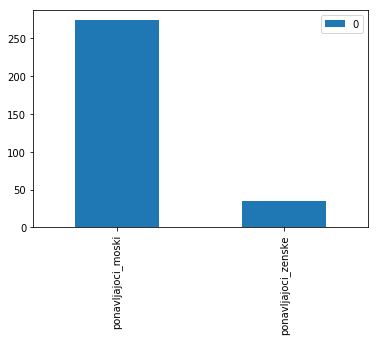

In [31]:
pd.DataFrame.from_dict({'ponavljajoci_moski' : len(ponavljajoci_moski), 'ponavljajoci_zenske' : len(ponavljajoci_zenske)}, 'index' ).plot(kind = 'bar')

Iz grafa takoj opazimo, da je več moških, ki obiskujejo maraton več let, kot žensk.

LETNICA ROJSTVA

In [32]:
def popravi_letnico(letnica):
    return 1900 + letnica
tab_moski19['letnica_rojstva'] = tab_moski19['letnica_rojstva'].map(popravi_letnico)
tab_zenske19['letnica_rojstva'] = tab_zenske19['letnica_rojstva'].map(popravi_letnico)

In [33]:
stevilo_letnic = {'moski19' : tab_moski19['letnica_rojstva'].value_counts(),
      'moski20':tab_moski20['letnica_rojstva'].value_counts(),
      'moski21': tab_moski19['letnica_rojstva'].value_counts(),
      'zenske19': tab_zenske19['letnica_rojstva'].value_counts(),
      'zenske20': tab_zenske20['letnica_rojstva'].value_counts(),
      'zenske21': tab_zenske21['letnica_rojstva'].value_counts()}

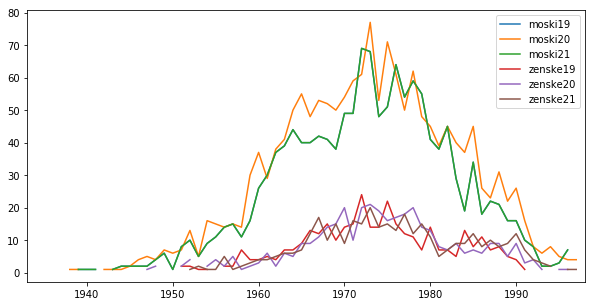

In [34]:
pd.DataFrame(stevilo_letnic).plot(figsize = (10,5))

Rezultati so pričakovani, največ tekmovalcev prihaja in sredinske starostne skupine. Le malo je starejših ljudi, ki se ukvarjajo s tekom.

In [35]:
def sekunde_v_cas(n):
    if n >= 3600:
        ure = n//3600
        minute = (n - ure*3600) // 60
        sekunde = n - ure * 3600 - minute * 60
    elif n >= 60:
        ure = 0
        minute = n//60
        sekunde = n - minute * 60
    else:
        ure = 0
        minute = 0
        sekunde = n
        
    return str(ure) + ':' + str(minute) + ':' + str(sekunde)

In [36]:
def dokoncali_tek(slov):
    dokoncali_tek = {}
    for tek in slov.keys():
        if 'DNF' in slov[tek]:
            pass
        else:
            dokoncali_tek[tek] = slov[tek]
    return dokoncali_tek
        
'''zenske, ki so dokončale vse tri maratone'''
zenske3maratoni = dokoncali_tek(ponavljajoci_zenske)
'''moski, ki so končali vse tri maratone'''
moski3maratoni = dokoncali_tek(ponavljajoci_moski)

In [37]:
'''funkcija ki glede na dano ime poišče uvrstitev'''

def uvrstitev(ime, tabela):
    try:
        a = (tabela.groupby('ime').mean())['mesto'][ime]
        return a
    except KeyError:
        return None
    
def najboljsa_uvrstitev(ime, tab):
    use = []
    for tabela in tab:
        a = uvrstitev(ime,tabela)
        if a == None:
            pass
        else:
            use.append(a)
    return max(use)

In [38]:
def povprecje(casi):
    povprecje = 0
    for rezultat in casi:
        povprecje += cas_v_sekunde(rezultat)
    povprecje = povprecje // 3
    return povprecje

def tabela_povprecij(slov):
    slov_povprecij = {}
    for tekmovalec in slov.keys():
        povprečje = povprecje(slov[tekmovalec])
        slov_povprecij[tekmovalec] = povprečje
    return pd.DataFrame.from_dict(slov_povprecij, 'index')

In [39]:
povprecje_zenske = (tabela_povprecij(zenske3maratoni)).applymap(sekunde_v_cas)
'''povprečje časov, ki so ga dosegle na treh maratonih'''

povprecje_zenske.columns= ['povprečje časov']


povprecje_moski = (tabela_povprecij(moski3maratoni)).applymap(sekunde_v_cas)
povprecje_moski.columns = ['povprečje časov']

In [40]:
'''najboljša uvrstitev tekmovalcev, ki so bili na vseh treh maratonih'''
def vse_naj_uvrstitve(slov, tab):
    uvrstitve = {}
    for tekmovalec in slov.keys():
        naj_uvrstitev = najboljsa_uvrstitev(tekmovalec, tab)
        uvrstitve[tekmovalec] = naj_uvrstitev
    return uvrstitve
tabela_naj_uvrstitev_z = pd.DataFrame.from_dict(vse_naj_uvrstitve(zenske3maratoni, [tab_zenske19, tab_zenske20, tab_zenske21]), 'index')
tabela_naj_uvrstitev_z.columns = ['najboljša uvrstitev']

tabela_naj_uvrstitev_m = pd.DataFrame.from_dict(vse_naj_uvrstitve(moski3maratoni, [tab_moski19, tab_moski20, tab_moski21]), 'index')
tabela_naj_uvrstitev_m.columns = ['najboljša uvrstitev']

In [41]:
pd.concat([tabela_naj_uvrstitev_m,povprecje_moski],axis = 1)

,najboljša uvrstitev,povprečje časov
Ocepek Martin,19.0,2:38:4
Senica Vid,24.0,2:41:24
Tratnik Marko,22.0,2:39:57
Jost Vinko,34.0,2:48:21
Kralj Uroš,86.0,2:53:50
Hasanović Izudin,66.0,2:55:44
Kočar Sašo,145.0,3:0:10
Gregorc Gregor,57.0,2:53:56
Majcen Marjan,59.0,2:55:34
Alt Marjan,98.0,2:58:38


In [42]:
pd.concat([tabela_naj_uvrstitev_z,povprecje_zenske],axis = 1)

,najboljša uvrstitev,povprečje časov
Rakušček Katja,20.0,3:16:3
Urban Maja,18.0,3:9:30
Stržinar Marjeta,19.0,3:17:16
Lapanja Marinka,40.0,3:26:44
Zevnik Andreja,34.0,3:24:38
Potočnik Tanja,28.0,3:16:53
Senković Senka,58.0,3:33:35
Prosen Tina,58.0,3:32:21
Trontelj Marija,41.0,3:30:47
Arnež Teja,63.0,3:36:2


Tekači, ki tečejo več let, dosegajo vsako leto drugačne rezultate. Odvisni so predvsem od pripravljenosti, tako fizične kot psihične.
Tekmovalci imajo lahko tudi 'slab dan', zato se v veliko športih zbira rezultate in nakoncu pogleda povprečje le teh. 
Zgornja tabela nam navaja ravno to, povprečje časov, ki so jih posamezni tekmovalci dosegli na tekmovanjih.
Tabela je razporejena po najbolšem povprečnem času padajoče.
Vidimo, da so nekateri tekmovalci z boljšimi povprečnimi časi, dosegli tudi slabše najboljše uvrstitve.